In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [12]:
# Specify number of neurons in each layer
input_layer = 2
hidden_layer = 2
output_layer = 1

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
def sigmoid_gradient(z):
    sig_z = sigmoid(z)
    return np.multiply(sig_z, (1 - sig_z))

In [15]:
from sklearn import datasets

In [16]:
iris_raw = datasets.load_iris()

### Mean center data

In [17]:
x = iris_raw.data[:,-2:][50:]
x = ((x - x.min(axis=0))/(x.max(axis=0) - x.min(axis=0)))

In [18]:
y = iris_raw.target[50:]
y[y == 1] = 0
y[y == 2] = 1

In [19]:
def neural_network():
    # learning rate alpha
    alpha = 0.1
    np.random.seed(25)
    # initialize theta_one and theta_two with uniformely distributed random values
    theta_one = np.random.uniform(0, 1, 6).reshape(2, 3)
    theta_two = np.random.uniform(0, 1, 3).reshape(1, 3)
    #m are number of samples, where each column is one sample
    m = 100
    iterations = 200
    error_total = 0
    j_local = 0
    j_history = []
    iteration_count = []
    my_output = []
    counter = 0
    for skip in range(0,100):
        x_test = x[skip]
        x_input = np.delete(x, (skip), axis=0)
        y_test = y[skip]
        y_output = np.delete(y, (skip), axis=0)
        for itera in range(0,200):
            triangle_one = np.zeros(6).reshape(2,3)
            triangle_two = np.zeros(3).reshape(1,3)
            for i in range(0, 99):
                a_one = np.insert(x_input[i], 0, 1, axis=0)
                a_one = a_one.reshape(3,1)
                z_two = np.dot(theta_one, a_one)
                # a_two activation by sending it to sigmoid function
                a_two = sigmoid(z_two)
                # insert 1 as bias term to a_two
                a_two = np.insert(a_two, 0, 1, axis=0)
                z_three = np.dot(theta_two, a_two)
                a_three = sigmoid(z_three)

                #find delta i.e. d3, d2
                j_local += (y_output[i]*math.log10(a_three[0][0]) + (1-y_output[i])*math.log10(1-a_three[0][0]))

                d3 = np.subtract(a_three, y_output[i])
                sig_grad_z_two = sigmoid_gradient(np.insert(z_two, 0, 1, axis=0))
                d2 = np.multiply(np.dot(theta_two.T, d3), sig_grad_z_two)
                #we don't need 1st value as it is bias term
                d2 = d2[1:,:]
                #find big delta by the formula which are denoted by triangle, so variable is also named triangle
                triangle_one += np.dot(d2, a_one.T)
                triangle_two += np.dot(d3, a_two.T)
                #theta gradient is big delta divided by m, where m is number of samples
            j_history.append(j_local/-99)
            j_local = 0
            counter += 1
            #Because of leave one out approach, divide by m - 1
            theta_one_gradient = triangle_one/(m-1)
            theta_two_gradient = triangle_two/(m-1)
            #update theta values for next iteration
            #updated_theta = theta - alpha * theta_gradient
            theta_one = np.subtract(theta_one, np.multiply(alpha, theta_one_gradient))
            theta_two = np.subtract(theta_two, np.multiply(alpha, theta_two_gradient))

        a_one = np.insert(x_test, 0, 1, axis=0)
        a_one = a_one.reshape(3,1)
        z_two = np.dot(theta_one, a_one)
        # a_two activation by sending it to sigmoid function
        a_two = sigmoid(z_two)
        # insert 1 as bias term to a_two
        a_two = np.insert(a_two, 0, 1, axis=0)
        z_three = np.dot(theta_two, a_two)
        a_three = sigmoid(z_three)
        
        #Calculate mean squared error
        #find delta i.e. d3, d2
        if(np.asscalar(a_three) >= 0.5):
            a_three[0][0] = 1
        else:
            a_three[0][0] = 0
        my_output.append(a_three[0][0])
        error = np.abs(np.asscalar(np.subtract(a_three, y_test)))
        error_total += error
    return theta_one, theta_two, error_total/m, j_history, my_output

In [20]:
theta_one_trained, theta_two_trained, error_average, j_history, my_output = neural_network()

In [21]:
print("Average error of neural net is {}%".format(error_average*100))

Average error of neural net is 9.0%


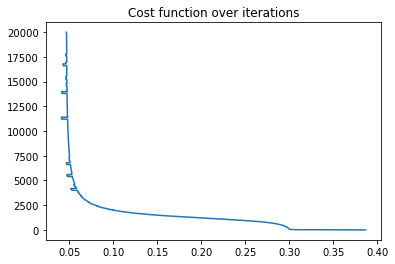

In [22]:
plt.plot(j_history, np.arange(0,len(j_history)))
plt.title("Cost function over iterations")

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
my_target = np.array(my_output, dtype=int)

In [25]:
accuracy = 100 - (y != my_target).sum()/float(len(y))*100

In [26]:
print("Accuracy of this neural net is {}%".format(accuracy))

Accuracy of this neural net is 91.0%


In [29]:
error_average

0.089999999999999997